In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df_train=pd.read_csv('https://raw.githubusercontent.com/JoannaBroniarek/House-Prices-Advanced-Regression-Techniques/master/dane/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_test=pd.read_csv('https://raw.githubusercontent.com/JoannaBroniarek/House-Prices-Advanced-Regression-Techniques/master/dane/test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
df_train.shape

(1460, 81)

# Preprocessing

In [5]:
# finding number of null values
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
percent_missing = df_train.isnull().sum() * 100 / len(df_train)
missing_value_df = pd.DataFrame({'column_name': df_train.columns,
                                 'percent_missing': percent_missing})

In [ ]:
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df.tail(20)

,column_name,percent_missing
Utilities,Utilities,0.000000
Electrical,Electrical,0.068493
MasVnrType,MasVnrType,0.547945
MasVnrArea,MasVnrArea,0.547945
BsmtQual,BsmtQual,2.534247
BsmtCond,BsmtCond,2.534247
BsmtFinType1,BsmtFinType1,2.534247
BsmtFinType2,BsmtFinType2,2.602740
BsmtExposure,BsmtExposure,2.602740
GarageQual,GarageQual,5.547945


In [6]:
df_train.drop(['FireplaceQu', 'Fence','Alley','MiscFeature','PoolQC'], inplace=True, axis=1)

In [7]:
df_test.drop(['FireplaceQu', 'Fence','Alley','MiscFeature','PoolQC'], inplace=True, axis=1)

In [8]:
df_train.dropna()
df_test.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2912,20,RL,80.0,13384,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,5,2006,WD,Normal
1452,2913,160,RM,21.0,1533,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,12,2006,WD,Abnorml
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml


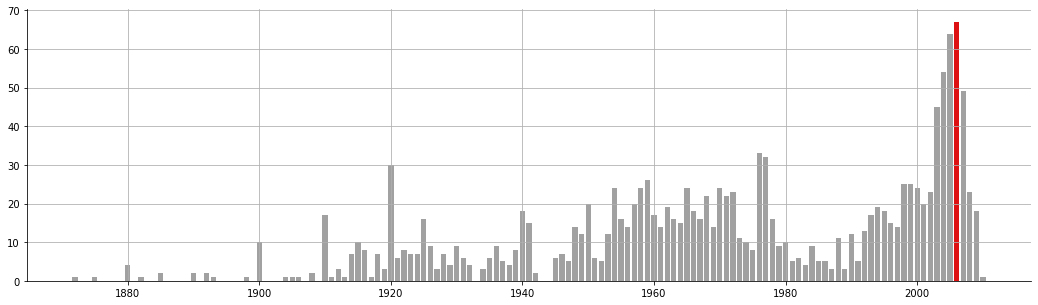

In [13]:
built = df_train['YearBuilt'].value_counts().sort_index()
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
color = ['#a1a1a1' if val != max(built) else '#dd1111' for val in built]
ax.bar(built.index, built, color=color)
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
ax.grid()
plt.show()

In [14]:
df_train['HouseStyle'] = df_train['HouseStyle'].apply(lambda x : 'ETC' if x in ['SLvl', 'SFoyer', '1.5Unf', '2.5Unf', '2.5Fin'] else x)
df_test['HouseStyle'] = df_test['HouseStyle'].apply(lambda x : 'ETC' if x in ['SLvl', 'SFoyer', '1.5Unf', '2.5Unf', '2.5Fin'] else x)

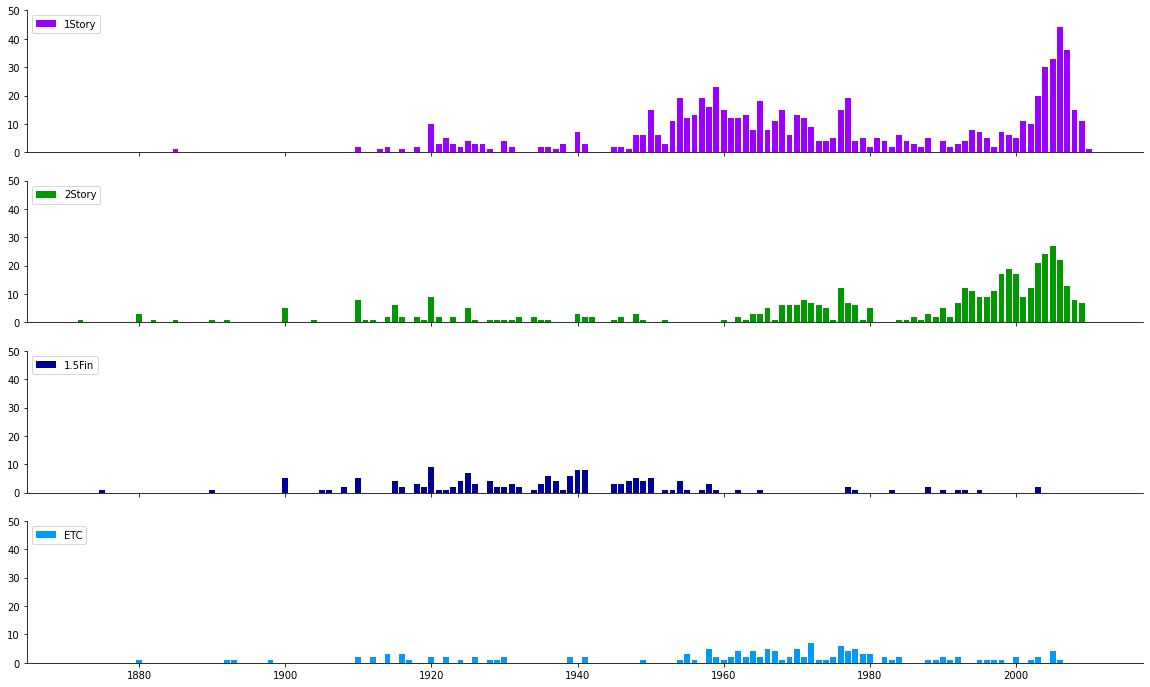

In [15]:
fig, ax = plt.subplots(4, 1, figsize=(20, 12), sharex=True)
color = ["#9900ff", "#009900", '#000099', '#0099ff']

for i, hs in enumerate(df_train['HouseStyle'].value_counts().index):
    hs_built = df_train[df_train['HouseStyle']==hs]['YearBuilt'].value_counts()
    ax[i].bar(hs_built.index, hs_built, color=color[i], label=hs)
    ax[i].set_ylim(0, 50)
    ax[i].legend(loc='upper left')
    for s in ['top', 'right']:
        ax[i].spines[s].set_visible(False)



plt.show()

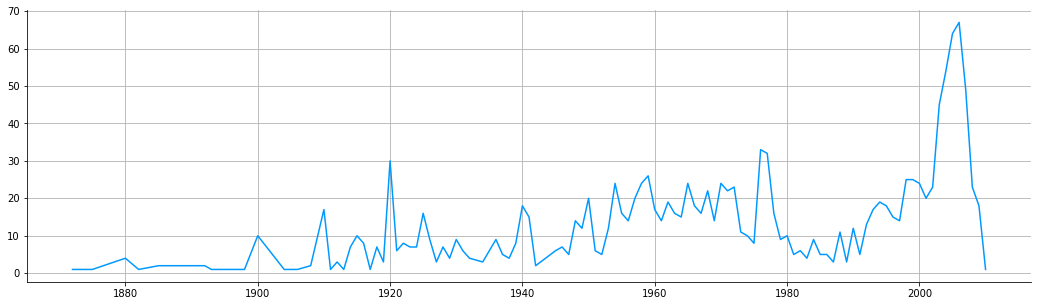

In [18]:
built = df_train['YearBuilt'].value_counts().sort_index()
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.plot(built.index, built, color='#0099ff')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid()

plt.show()

In [19]:
df_train["Date"] = df_train['YrSold'].astype(str) +"-"+ df_train["MoSold"].astype(str)
df_test["Date"] = df_test['YrSold'].astype(str) +"-"+ df_test["MoSold"].astype(str)
df_train["Date"] = pd.to_datetime(df_train["Date"], format='%Y-%m-%d')
df_test["Date"] = pd.to_datetime(df_test["Date"], format='%Y-%m-%d')

In [20]:
result_df = df_train.sort_values(by = ['Date','MoSold'])
result_df = pd.DataFrame(result_df, columns=['Date', 'SalePrice']).reset_index()

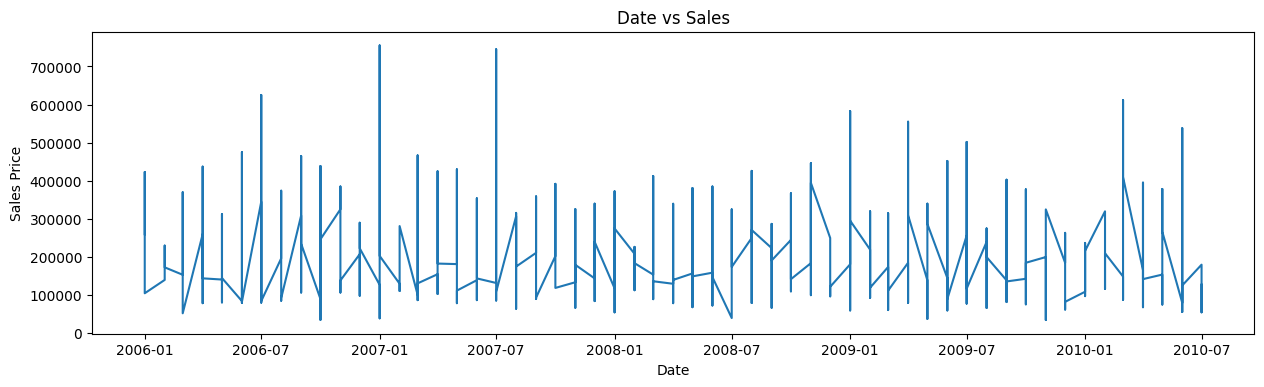

In [21]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Sales Price', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(result_df, x=result_df['Date'], y=result_df['SalePrice'], title='Date vs Sales')

In [22]:
result_df.head()
result_df.drop("index",inplace = True,axis=1)

In [23]:
result_df.head()

,Date,SalePrice
0,2006-01-01,260000
1,2006-01-01,228000
2,2006-01-01,205000
3,2006-01-01,172400
4,2006-01-01,145000


# Rolling mean

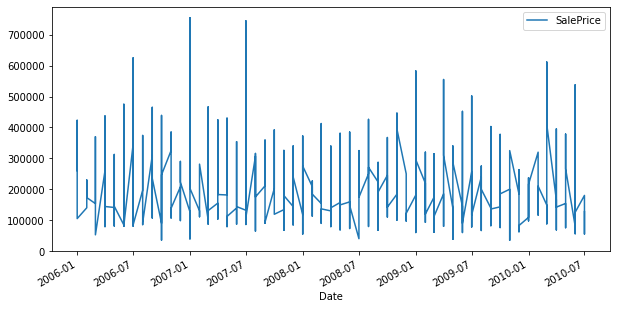

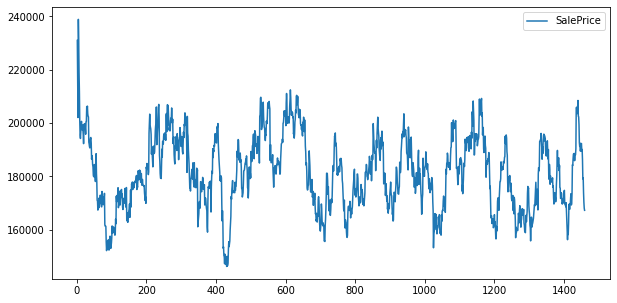

The larger the window coefficient the smoother the line will appear
The min_periods is the minimum number of observations in the window required to have a value


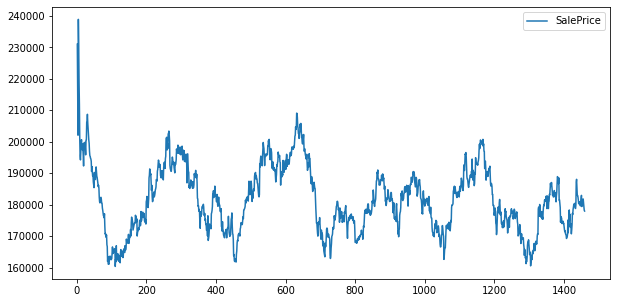

In [28]:
result_df.set_index('Date')
result_df=result_df.fillna(0)

fig, axs = plt.subplots(figsize=(10,5))
result_df.plot(x='Date', ax=axs)
plt.show()

fig, axs = plt.subplots(figsize=(10,5))
result_df.rolling(window=30,min_periods=3).mean().plot( ax=axs)
plt.show()
print("The larger the window coefficient the smoother the line will appear")
print('The min_periods is the minimum number of observations in the window required to have a value')

fig, axs = plt.subplots(figsize=(10,5))
result_df.rolling(window=60,min_periods=3).mean().plot(ax=axs)
plt.show()

# Decomposition

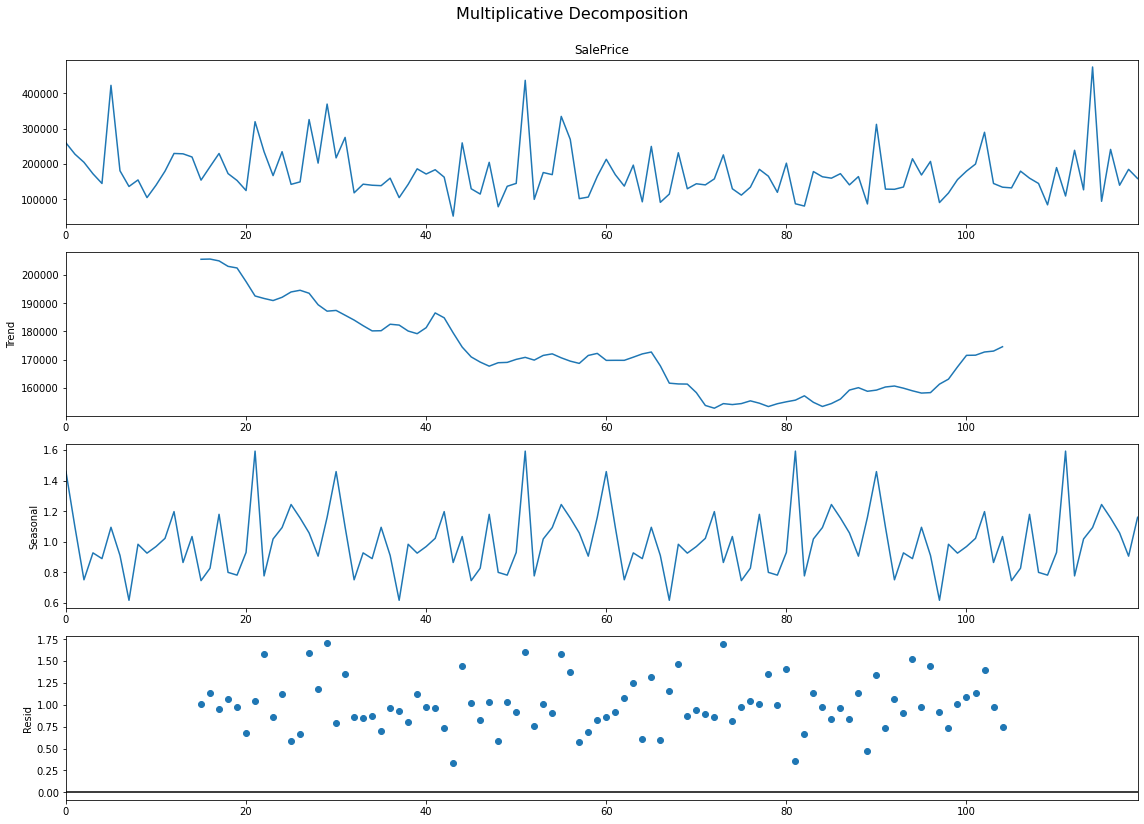

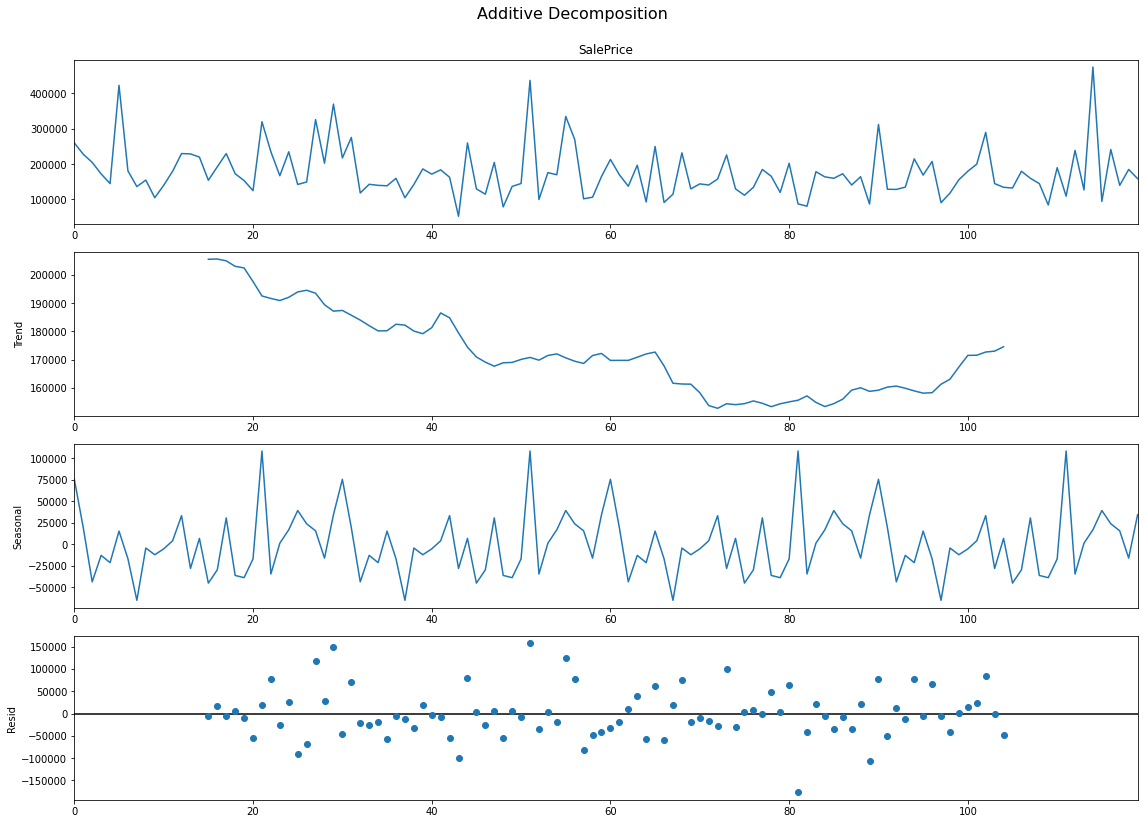

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

new_df=result_df.iloc[0:120,:]

# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(new_df['SalePrice'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(new_df['SalePrice'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

# Stationarity

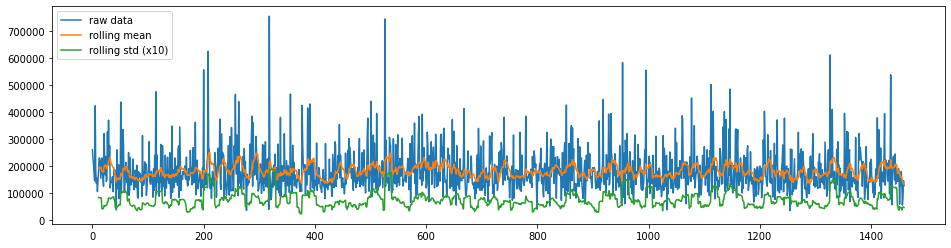

In [33]:
series = result_df['SalePrice']
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(series,'raw data')

In [35]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -38.54252468592106
n_lags: 0.0
p-value: 0.0
Critial Values:
   1%, -3.4348399537053482
Critial Values:
   5%, -2.8635230163107837
Critial Values:
   10%, -2.5678257404326903


<ipython-input-39-230a03966f81>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['SalePriceDiff1'] = diff(new_df['SalePrice'],k_diff=1)
<ipython-input-39-230a03966f81>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['SalePriceDiff2'] = diff(new_df['SalePrice'],k_diff=2)
<ipython-input-39-230a03966f81>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

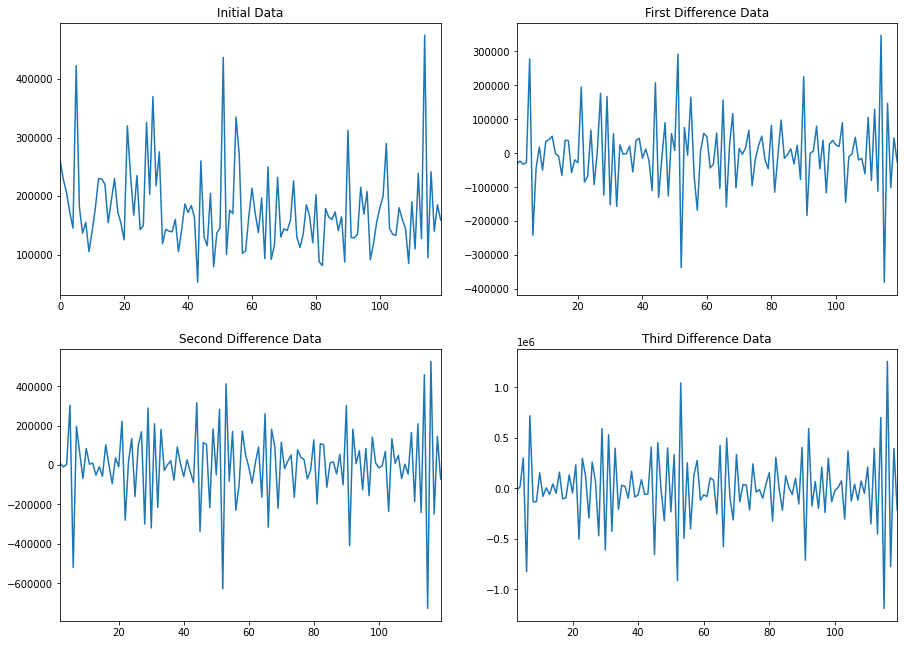

In [39]:
from statsmodels.tsa.statespace.tools import diff
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15, 11))
# new_df = pd.DataFrame()
new_df['SalePriceDiff1'] = diff(new_df['SalePrice'],k_diff=1)
new_df['SalePriceDiff2'] = diff(new_df['SalePrice'],k_diff=2)
new_df['SalePriceDiff3'] = diff(new_df['SalePrice'],k_diff=3)

new_df['SalePrice'].plot(title="Initial Data",ax=ax[0][0]).autoscale(axis='x',tight=True);
new_df['SalePriceDiff1'].plot(title="First Difference Data",ax=ax[0][1]).autoscale(axis='x',tight=True);
new_df['SalePriceDiff2'].plot(title="Second Difference Data",ax=ax[1][0]).autoscale(axis='x',tight=True);
new_df['SalePriceDiff3'].plot(title="Third Difference Data",ax=ax[1][1]).autoscale(axis='x',tight=True);
     

In [41]:
autocorrelation_lag1 = result_df['SalePrice'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

autocorrelation_lag3 = result_df['SalePrice'].autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = result_df['SalePrice'].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = result_df['SalePrice'].autocorr(lag=9)
print("Nine Month Lag: ", autocorrelation_lag9)

One Month Lag:  -0.00951139838053
Three Month Lag:  -0.0038466304887539364
Six Month Lag:  -0.02171094116713255
Nine Month Lag:  -0.02987550731914915


# Forecasting

In [66]:
df_num = df_train.select_dtypes(include = ['float','int'])

In [74]:
x = df_num.drop(["SalePrice","GarageYrBlt","LotFrontage"], axis = 1)

y = df_num["SalePrice"]

In [95]:
x = x.fillna(0)

In [96]:
from sklearn.model_selection import train_test_split, cross_val_score
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size =0.25)

In [86]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
lin_reg = LinearRegression()

In [97]:
lin_reg.fit(xtrain,ytrain)

LinearRegression()

In [98]:
prediction = lin_reg.predict(xtest)

In [99]:
ytest

673     257500
1415    175900
847     133500
596     114504
660     197900
         ...  
1366    193000
300     157000
1432     64500
950     129000
307      89500
Name: SalePrice, Length: 365, dtype: int64

In [111]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,mean_squared_error
print(lin_reg.score(xtrain,ytrain))
print(mean_squared_error(ytest,prediction))

0.8417605501615526
2019479083.1587074


In [107]:
x.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [108]:
features = ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']
x_test = df_test[features]

In [109]:
x_test.fillna(method='bfill', inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [110]:
prediction_with_linear = lin_reg.predict(x_test)

### Conclusion:
1. Based on auto-correlation scores, it is clear that neither a short-term nor a long-term trend exists in the data.
2. The results of the stationary test showed that the data is stationary, further indicating that there are no seasonal patterns or trends in the data.
The accuracy of the linear regression model fitted to the train data is 84%.
3. Only those data attributes that have a strong correlation with the desired output have we used.
4. Another helpful method for illustrating the trends in time series data is trend decomposition.
5. We can detect a decreasing tendency in property sale prices at first and subsequently an upward trend from the plot